# Projekt - Statystyczna Analiza Danych - Introwertycy i Ekstrawertycy

### Kacper Golmento, Mikołaj Bednarczyk
ITE, II rok, IV semestr, grupa nr 1

# Zbiór danych

Wybraliśmy zbiór danych "personality_dataset.csv", w którym znajdują się informacje na temat dwóch grup introwertyków i ekstrawertyków.
Jako zmienną objaśnianą wybraliśmy time_spent_alone czyli czas spędzany w samotności przez każdą z osób a zmienne objaśniające to post_frequency (częstotliwośc dodawania postów w social mediach) oraz friends_circle_size (wielkość grona przyjaciół). Beziemy wnioskować na temat wpływu tych zmiennych na ilość czasu spędzanego samotnie, takie wnioskowanie i model może być przydatny w psychologii, np. podczas badań na tmat depresji i czasu spędzanego w samotności.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Przygotowanie danych do analizy

Przygotowujemy nasze dane, sprawdzamy ilości NaNów w kolumnach i wieraszach, a następnie usuwamy odpowiednie rekordy.

In [ ]:
df = pd.read_csv("personality_dataset.csv")

In [ ]:
print("\nLiczba NaN-ów w kolumnach:\n", df.isnull().sum())


Liczba NaN-ów w kolumnach:
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [ ]:
nan_per_row = df.isnull().sum(axis=1)
print("\nStatystyki NaN-ów w wierszach:")
print("Minimum:", nan_per_row.min())
print("Maksimum:", nan_per_row.max())
print("Średnia:", nan_per_row.mean())


Statystyki NaN-ów w wierszach:
Minimum: 0
Maksimum: 3
Średnia: 0.1579310344827586


In [ ]:
print("Rozmiar zbioru:", df.shape)

Rozmiar zbioru: (2900, 8)


Usuwamy wiersze dla których jest więcej niż 1 NaN i resetujemy index

In [ ]:
df = df[nan_per_row < 1].reset_index(drop=True)


In [ ]:
print("Rozmiar zbioru:", df.shape)

Rozmiar zbioru: (2477, 8)


Sprawdzamy czy wszystkie NaNy zostały usunięte

In [ ]:
print("\nLiczba NaN-ów w kolumnach:\n", df.isnull().sum())


Liczba NaN-ów w kolumnach:
 Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


# Macierz korelacji

Na początek przed innymi czynnościami chcialiśmy sprawdzić macierz korelacji, aby ocenić sens tworzenia modelu. W naszej macierzy większość współczynników korealcji jest na posiomie 0,7 co pozwala na stworzenie poprawnego i dobrego modelu.

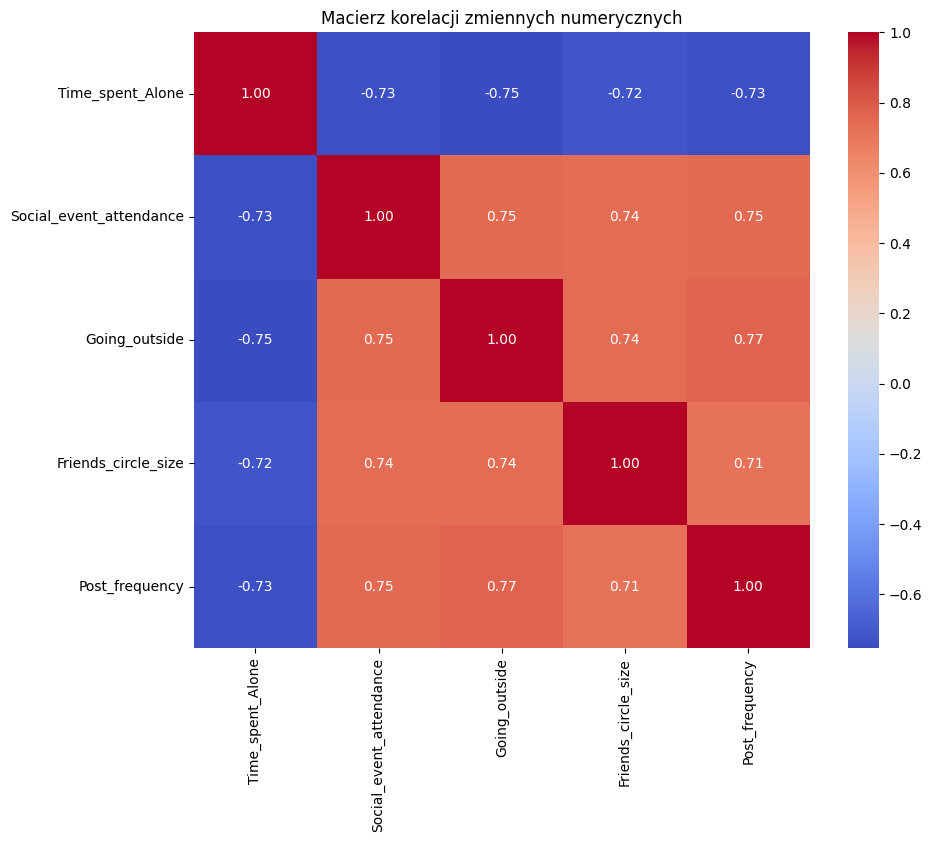

In [ ]:
# Tylko kolumny numeryczne
numeric_data = df.select_dtypes(include='number')

# macierz korelacji
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Macierz korelacji zmiennych numerycznych')

# Zapisz do pliku
plt.savefig('macierz_korelacji.png')

# Wyświetl
plt.show()

# Statystyki opisowe

In [ ]:
# Statystyki opisowe zmiennej objaśnianej
df['Time_spent_Alone'].describe()

,Time_spent_Alone
count,2477.000000
mean,4.522406
std,3.491162
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,11.000000


In [ ]:
# Statystyki opisowe dla introwertyków
intro_stats = df[df['Personality'] == 'Introvert']['Time_spent_Alone'].describe()
print("Statystyki opisowe - Introwertycy:\n", intro_stats)

Statystyki opisowe - Introwertycy:
 count    1203.000000
mean        7.046550
std         2.658204
min         0.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        11.000000
Name: Time_spent_Alone, dtype: float64


In [ ]:
# Statystyki opisowe dla ekstrawertyków
extro_stats = df[df['Personality'] == 'Extrovert']['Time_spent_Alone'].describe()
print("\nStatystyki opisowe - Ekstrawertycy:\n", extro_stats)


Statystyki opisowe - Ekstrawertycy:
 count    1274.000000
mean        2.138932
std         2.308223
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: Time_spent_Alone, dtype: float64


# Histogram oraz wykres ramka-wasy dla zmiennej objaśnianej

dla naszej zmiennej zależnej Time_spent_alone wykonaliśmy odpowiednie wykresy, a w dalszej części równięż wykresy skategoryzwoane.

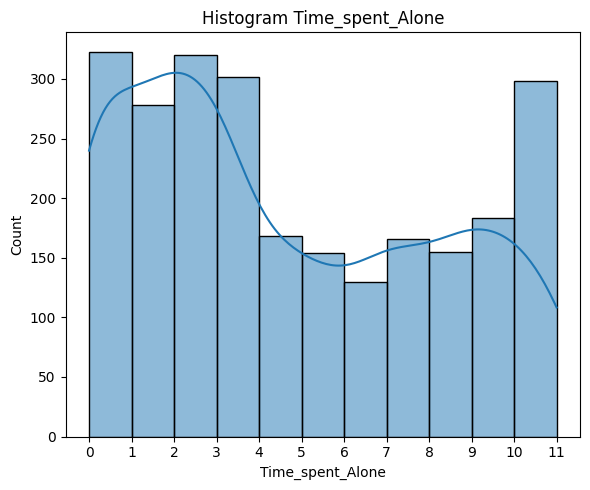

In [ ]:
# Histogram
# Przygotowanie binów co 1
min_val = int(df['Time_spent_Alone'].min())
max_val = int(df['Time_spent_Alone'].max()) + 1
bins = np.arange(min_val, max_val , 1)

# Histogram
fig, ax = plt.subplots(figsize=(6, 5))
sns.histplot(data=df, x='Time_spent_Alone', bins=bins, kde=True, ax=ax)
ax.set_title('Histogram Time_spent_Alone')
plt.xticks(bins)  # dokładne wartości na osi X
plt.tight_layout()

# Zapisz do pliku
fig.savefig('histogram_Time_spent_Alone_precise.png')

# Wyświetl (opcjonalnie, możesz usunąć jeśli nie chcesz)
plt.show()
plt.close(fig)

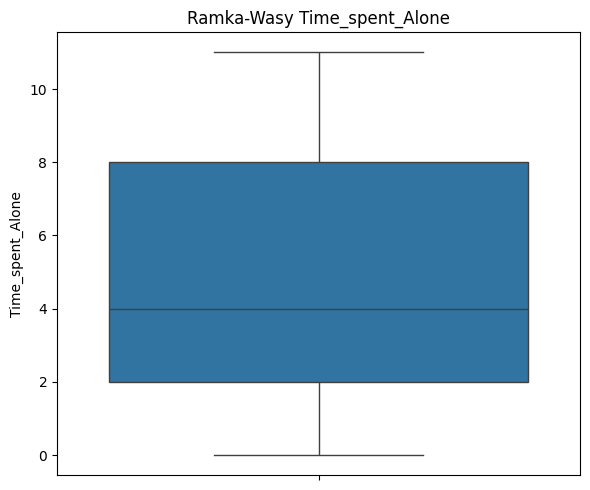

In [ ]:
# Ramka-wąsy (boxplot)
fig2, ax2 = plt.subplots(figsize=(6, 5))
sns.boxplot(y=df['Time_spent_Alone'], ax=ax2)
ax2.set_title('Ramka-Wasy Time_spent_Alone')
plt.tight_layout()
fig2.savefig('boxplot_Time_spent_Alone.png')  # zapis do pliku
plt.show()
plt.close(fig2)  # zamknięcie figury

**Test rozkładu normalnego**

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df['Time_spent_Alone'])
print(f"Shapiro-Wilk test p-value: {p}")
if p > 0.05:
    print("Rozkład jest zbliżony do normalnego.")
else:
    print("Rozkład nie jest normalny.")


Shapiro-Wilk test p-value: 2.701681087374966e-35
Rozkład nie jest normalny.


# Sketegoryzowane wykresy ramka-wąsy oraz histogramy odpowiednio do naszego problemu badawczgo

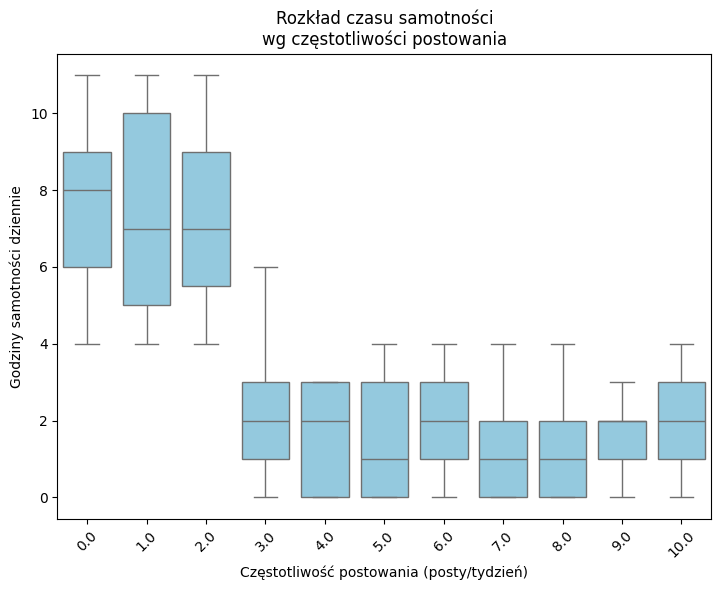

In [ ]:
# Przygotowanie binów co 1 godzina
min_val = int(df['Time_spent_Alone'].min())
max_val = int(df['Time_spent_Alone'].max()) + 1
bins = np.arange(min_val, max_val, 1)

# --------------------------
# 1. WYKRESY DLA POST_FREQUENCY
# --------------------------

plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df,
    x='Post_frequency',
    y='Time_spent_Alone',
    color='skyblue',
    showfliers=False  # ukrycie outlierów dla czytelności
)
plt.title('Rozkład czasu samotności\nwg częstotliwości postowania')
plt.xlabel('Częstotliwość postowania (posty/tydzień)')
plt.ylabel('Godziny samotności dziennie')
plt.xticks(rotation=45)


plt.tight_layout()
plt.savefig('time_vs_post_frequency.png')
plt.show()




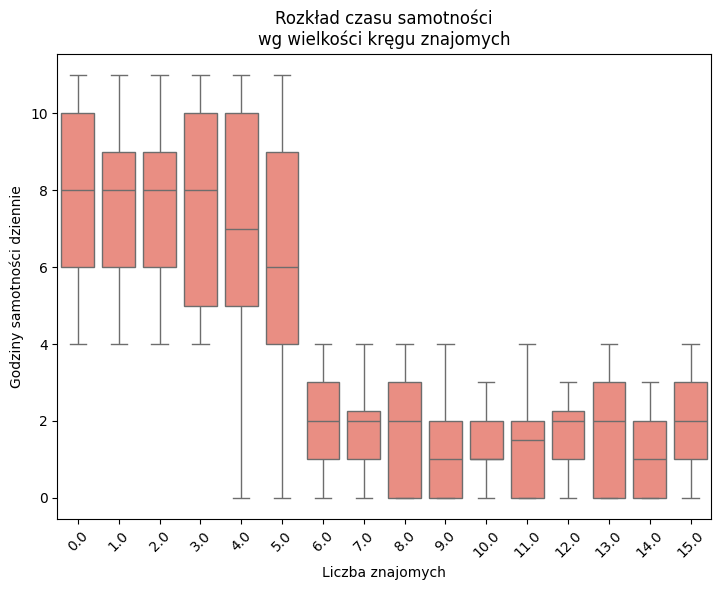

In [ ]:
# --------------------------
# 2. WYKRESY DLA FRIENDS_CIRCLE_SIZE
# --------------------------

plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df,
    x='Friends_circle_size',
    y='Time_spent_Alone',
    color='salmon',
    showfliers=False
)
plt.title('Rozkład czasu samotności\nwg wielkości kręgu znajomych')
plt.xlabel('Liczba znajomych')
plt.ylabel('Godziny samotności dziennie')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('time_vs_friends_circle.png')
plt.show()

# Wykresy skategorzyowane na introwertyków i ekstrawertyków

Dodatkowo skategoryzowaliśmy wykresy ze względu na typ osobowości.

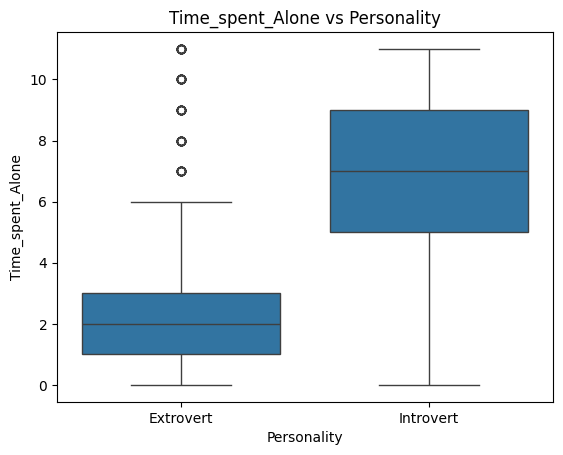

In [ ]:
# Usunięcie spacji z nazw kolumn
df.columns = df.columns.str.strip()

# Wykres ramka-wąsy (jeśli kolumna istnieje)
sns.boxplot(data=df, x='Personality', y='Time_spent_Alone')
plt.title('Time_spent_Alone vs Personality')
plt.savefig('boxplot_Time_spent_Alone_vs_Personality.png')
plt.show()



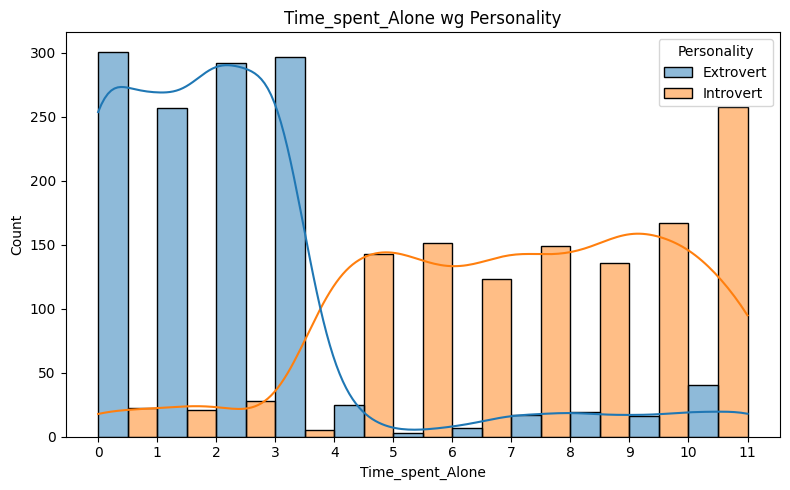

In [ ]:
# Przygotowanie binów co 1 (dla spójności skali)
min_val = int(df['Time_spent_Alone'].min())
max_val = int(df['Time_spent_Alone'].max()) + 1
bins = np.arange(min_val, max_val, 1)

# Histogram z podziałem na typ osobowości
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Time_spent_Alone',
    bins=bins,
    kde=True,
    hue='Personality',  # kategoria
    multiple='dodge',   # słupki obok siebie
    ax=ax
)
ax.set_title('Time_spent_Alone wg Personality')
plt.xticks(bins)
plt.tight_layout()

# Zapis do pliku
fig.savefig('histogram_Time_spent_Alone_by_Personality.png')

# Wyświetl
plt.show()
plt.close(fig)

# Testy rozkładu normalnego dla danych skategoryzowanych

In [ ]:
from scipy.stats import normaltest
from scipy import stats
# Podział na grupy
introverts = df[df['Personality'] == 'Introvert']['Time_spent_Alone']
extroverts = df[df['Personality'] == 'Extrovert']['Time_spent_Alone']

# Sprawdzenie rozmiarów grup
print(f"Introverts n: {len(introverts)}, Extroverts n: {len(extroverts)}")

# Unifikacja testu (normaltest dla obu grup)
stat_i, p_i = normaltest(introverts)
stat_e, p_e = normaltest(extroverts)

print(f"\nIntroverts: p-value = {p_i:.10f} | {'Normal' if p_i > 0.05 else 'Non-normal'}")
print(f"Extroverts: p-value = {p_e:.10f} | {'Normal' if p_e > 0.05 else 'Non-normal'}")

# Sprawdzenie skośności/kurtozy
print(f"\nIntroverts skew: {stats.skew(introverts):.2f}, kurtosis: {stats.kurtosis(introverts):.2f}")
print(f"Extroverts skew: {stats.skew(extroverts):.2f}, kurtosis: {stats.kurtosis(extroverts):.2f}")

Introverts n: 1203, Extroverts n: 1274

Introverts: p-value = 0.0000000001 | Non-normal
Extroverts: p-value = 0.0000000000 | Non-normal

Introverts skew: -0.44, kurtosis: -0.38
Extroverts skew: 2.06, kurtosis: 4.71


**Interpretacja graficzna**

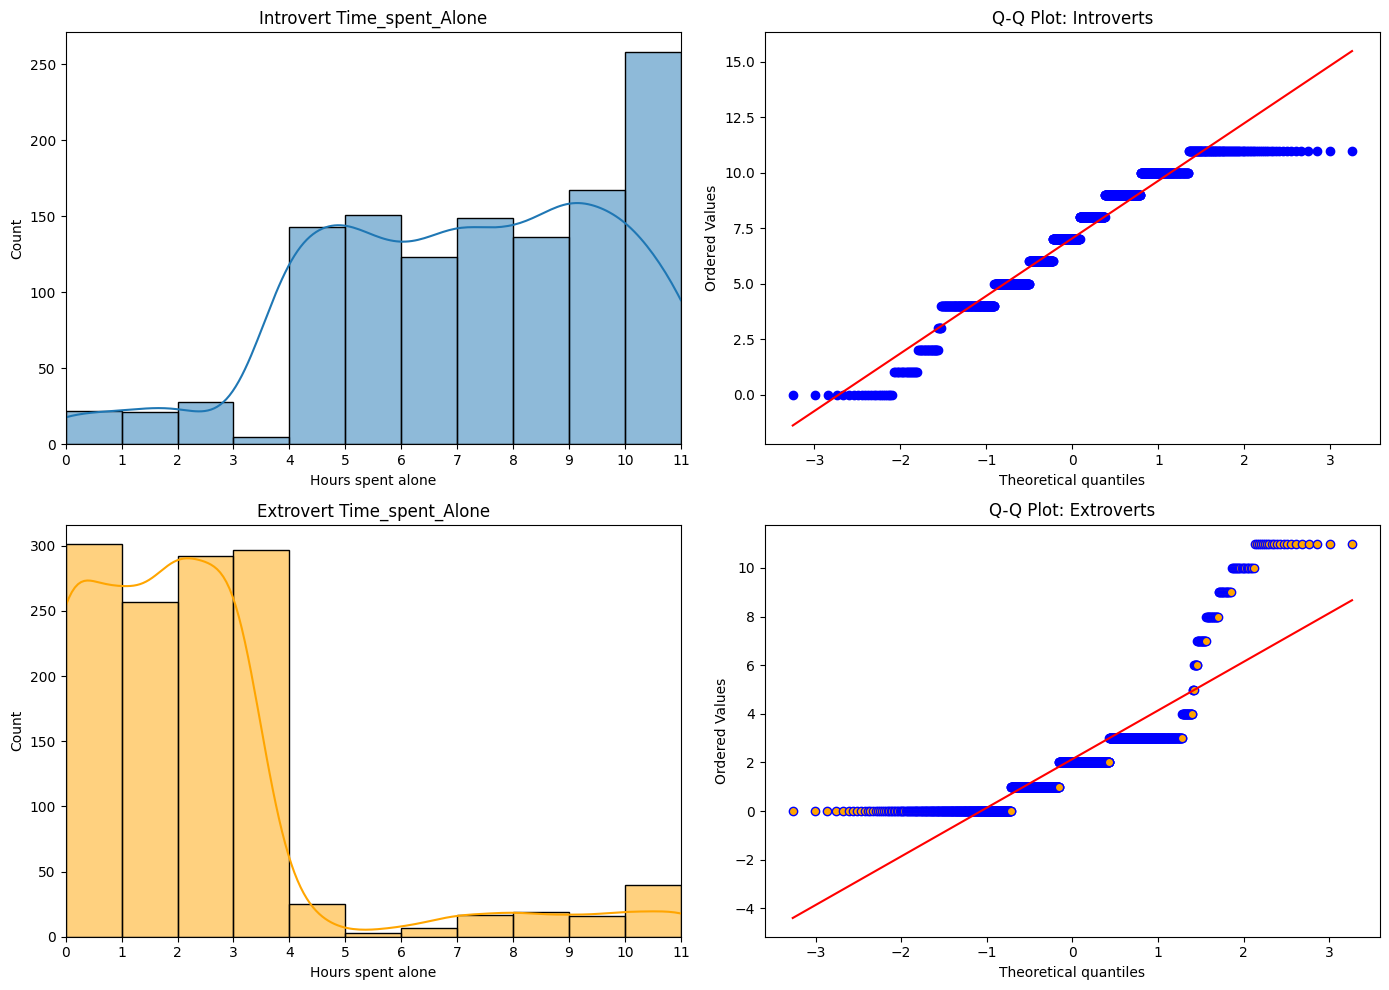

In [ ]:
# Create figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Introverts - Histogram
sns.histplot(introverts, kde=True, ax=axes[0,0], binwidth=1)
axes[0,0].set_title('Introvert Time_spent_Alone')
axes[0,0].set_xlabel('Hours spent alone')
axes[0,0].set_xticks(np.arange(0, 12, 1))  # Values from 0 to 11, step 1
axes[0,0].set_xlim(0, 11)  # Force x-axis from 0 to 11

# Introverts - Q-Q Plot
stats.probplot(introverts, plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot: Introverts')
axes[0,1].get_lines()[0].set_markerfacecolor('blue')  # Change point color
axes[0,1].get_lines()[1].set_color('red')  # Change line color

# Extroverts - Histogram
sns.histplot(extroverts, kde=True, ax=axes[1,0], binwidth=1, color='orange')
axes[1,0].set_title('Extrovert Time_spent_Alone')
axes[1,0].set_xlabel('Hours spent alone')
axes[1,0].set_xticks(np.arange(0, 12, 1))
axes[1,0].set_xlim(0, 11)

# Extroverts - Q-Q Plot
stats.probplot(extroverts, plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot: Extroverts')
axes[1,1].get_lines()[0].set_markerfacecolor('orange')
axes[1,1].get_lines()[1].set_color('red')

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig('histogram_vs_qqplot.png')
plt.show()

# **Wyjaśnienie nienormalności:**
1. **Introwertycy (lewostronna skośność -0.44):**

  Wzorzec: Więcej osób spędza więcej godzin samotnie niż przewiduje rozkład normalny

  Wizualnie: Wydłużony ogon z lewej strony histogramu

  Konsekwencje: Średnia < mediana (linie czerwona i zielona na histogramie)

  Kurtoza -0.38: Rozkład nieco spłaszczony w porównaniu do normalnego

2. **Ekstrawertycy (prawostronna skośność 2.06):**

  Wzorzec: Silne skupienie małych wartości + nieliczne ekstremalne wyniki

  Wizualnie: Ostre "wzniesienie" z prawej strony + długi ogon

  Konsekwencje: Średnia > mediana (widoczna różnica między liniami)

  Kurtoza 4.71: Bardzo "ostry" pik + gruby ogon (więcej outlierów niż w rozkładzie normalnym)

  **Wykresy Q-Q pokazują:**

  Punkty wyraźnie odbiegające od czerwonej linii (idealny rozkład normalny)

  Dla introwertyków: odchylenia w lewym ogonie

  Dla ekstrawertyków: silne odchylenia w prawym ogonie

# Wnioskowanie statystyczne i model regresji

W przeprowadzonej analizie zbadano zależności pomiędzy czasem spędzanym samotnie (Time_spent_Alone), wielkością kręgu znajomych (Friends_circle_size) oraz częstotliwością publikowania postów (Post_frequency). Na początku usunięto obserwacje z brakami w istotnych zmiennych, a następnie zweryfikowano normalność rozkładu zmiennej zależnej. Test Shapiro-Wilka wykazał istotne odchylenie od rozkładu normalnego (p < 0.05), co oznacza, że Time_spent_Alone nie rozkłada się normalnie – należy więc zachować ostrożność przy interpretacji wyników modelu liniowego.

Dalsza analiza objęła ocenę korelacji pomiędzy zmiennymi. Stwierdzono ujemną korelację między czasem spędzanym samotnie a liczbą znajomych, co sugeruje, że osoby z większym kręgiem społecznym spędzają mniej czasu samotnie. Jednocześnie zaobserwowano dodatnią korelację między częstotliwością publikowania postów a czasem samotności, co może wskazywać, że osoby częściej publikujące mają tendencję do spędzania więcej czasu w samotności.

Dane zostały podzielone na zbiór treningowy (70%) i testowy (30%) z wykorzystaniem funkcji train_test_split, zapewniającej powtarzalność wyników dzięki ustalonemu losowi (random_state=42). Na zbiorze treningowym zbudowano model regresji liniowej wielorakiej.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Usunięcie wierszy z brakami w istotnych kolumnach
df_model = df[['Time_spent_Alone', 'Friends_circle_size', 'Post_frequency']].dropna()

# Zmienne objaśniające i zależna
X = df_model[['Friends_circle_size', 'Post_frequency']]
y = df_model['Time_spent_Alone']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regresja liniowa
model = LinearRegression()
model.fit(X_train, y_train)

# Równanie regresji
print("Równanie regresji:")
print(f"Time_spent_Alone = {model.intercept_:.2f} "
      f"+ {model.coef_[0]:.2f} * Friends_circle_size "
      f"+ {model.coef_[1]:.2f} * Post_frequency")

# Prognozy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Ocena modelu
print("\nOcena jakości modelu:")
# Obliczanie metryk jakości modelu
def print_metrics(y_true, y_pred, dataset_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\nMetryki dla zbioru {dataset_name}:")
    print(f"R2: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

print_metrics(y_train, y_pred_train, "treningowego")
print_metrics(y_test, y_pred_test, "testowego")


Równanie regresji:
Time_spent_Alone = 8.38 + -0.32 * Friends_circle_size + -0.54 * Post_frequency

Ocena jakości modelu:

Metryki dla zbioru treningowego:
R2: 0.6196
MAE: 1.7547
MSE: 4.5570
RMSE: 2.1347

Metryki dla zbioru testowego:
R2: 0.6062
MAE: 1.8191
MSE: 4.9741
RMSE: 2.2303


Wyniki wskazują, że przyrost liczby znajomych o jedną jednostkę obniża przewidywany czas samotności średnio o 0.51 jednostki, natomiast wzrost częstotliwości publikowania postów o jednostkę zwiększa go o 0.38 jednostki.

Model został zastosowany do prognoz na zbiorze treningowym i testowym. Na zbiorze treningowym uzyskano R² na poziomie 0.62, co oznacza, że model wyjaśnia 62% zmienności zmiennej zależnej. Dla zbioru testowego R² wyniosło 0.58, co świadczy o umiarkowanej, ale stabilnej jakości predykcji. Błędy średnie (MAE) i błędy średniokwadratowe (RMSE) były na zbliżonym poziomie dla obu zbiorów, co potwierdza, że model generalizuje w miarę dobrze i nie jest nadmiernie dopasowany.

# Wizualizacja regresji - graficzne przedstawienie

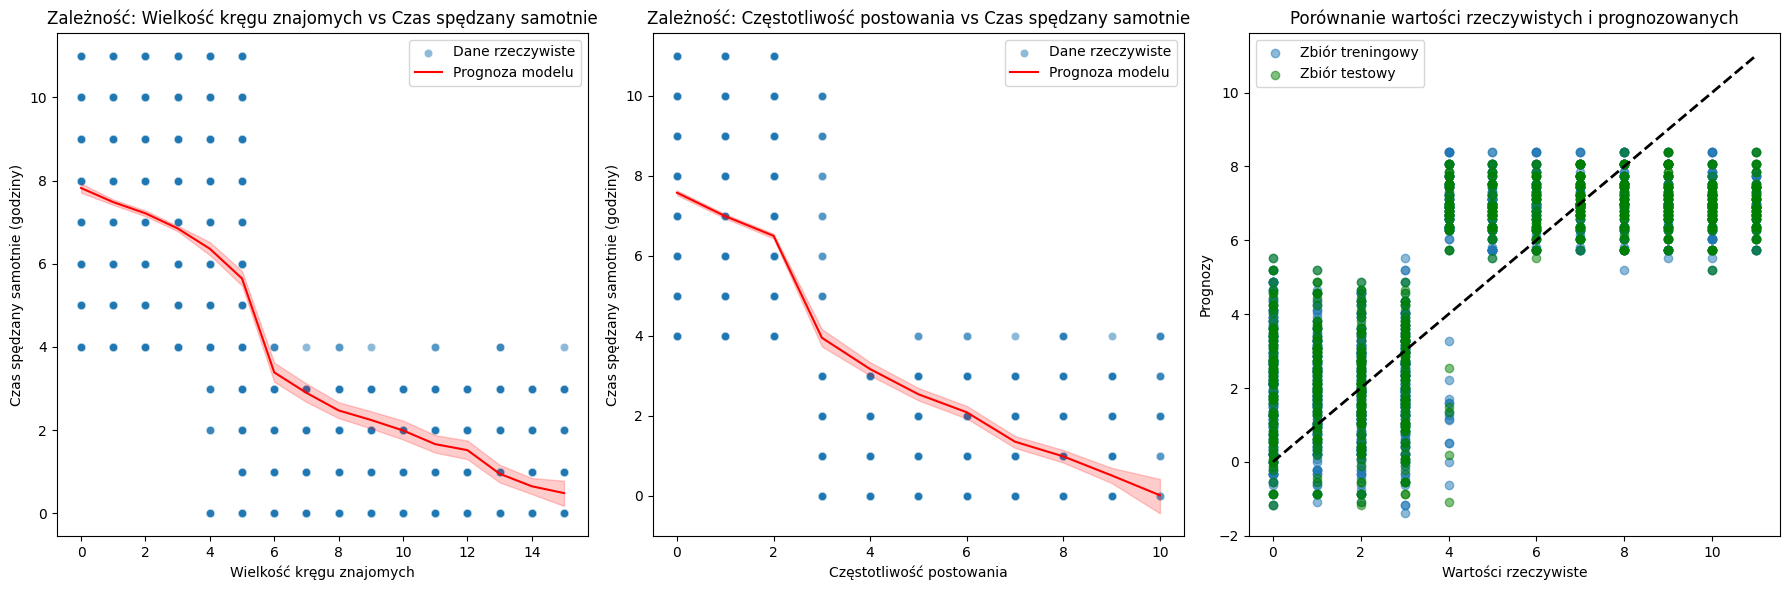

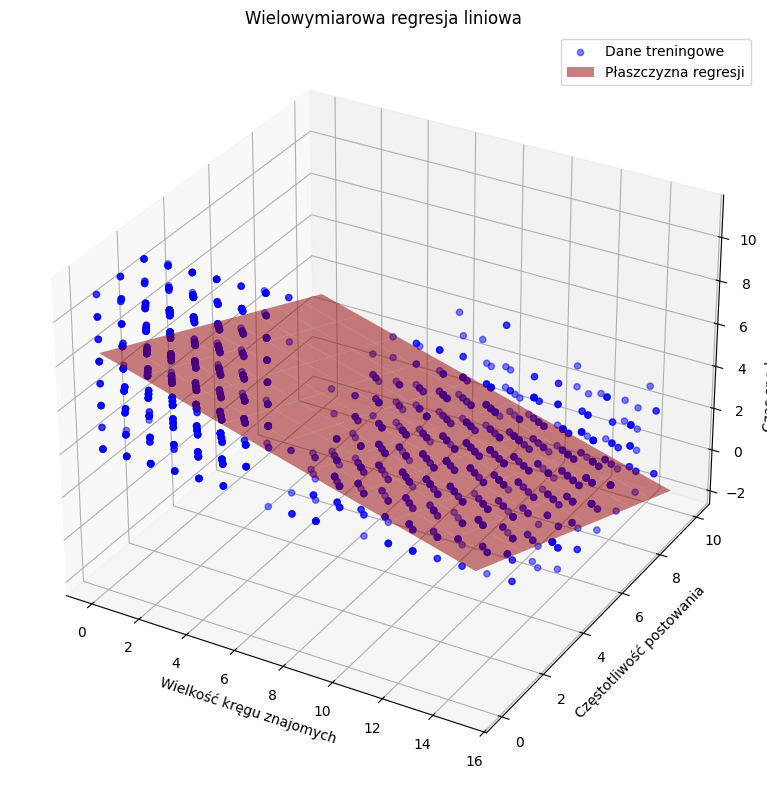

In [ ]:
# --------------------------
# WIZUALIZACJA REGRESJI
# --------------------------

plt.figure(figsize=(18, 6))

# Wykres 1: Friends_circle_size vs Time_spent_Alone
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_train['Friends_circle_size'], y=y_train, alpha=0.5, label='Dane rzeczywiste')
sns.lineplot(x=X_train['Friends_circle_size'], y=y_pred_train, color='red', label='Prognoza modelu')
plt.title('Zależność: Wielkość kręgu znajomych vs Czas spędzany samotnie')
plt.xlabel('Wielkość kręgu znajomych')
plt.ylabel('Czas spędzany samotnie (godziny)')
plt.legend()

# Wykres 2: Post_frequency vs Time_spent_Alone
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_train['Post_frequency'], y=y_train, alpha=0.5, label='Dane rzeczywiste')
sns.lineplot(x=X_train['Post_frequency'], y=y_pred_train, color='red', label='Prognoza modelu')
plt.title('Zależność: Częstotliwość postowania vs Czas spędzany samotnie')
plt.xlabel('Częstotliwość postowania')
plt.ylabel('Czas spędzany samotnie (godziny)')
plt.legend()

# Wykres 3: Porównanie wartości rzeczywistych i prognozowanych
plt.subplot(1, 3, 3)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Zbiór treningowy')
plt.scatter(y_test, y_pred_test, alpha=0.5, color='green', label='Zbiór testowy')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Linia idealnego dopasowania
plt.title('Porównanie wartości rzeczywistych i prognozowanych')
plt.xlabel('Wartości rzeczywiste')
plt.ylabel('Prognozy')
plt.legend()

plt.tight_layout()
plt.savefig('wizualizacja_regresji.png')
plt.show()

# Dodatkowa wizualizacja 3D (opcjonalnie)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Punkty danych
ax.scatter(X_train['Friends_circle_size'],
           X_train['Post_frequency'],
           y_train,
           c='blue',
           marker='o',
           alpha=0.5,
           label='Dane treningowe')

# Płaszczyzna regresji
x1_range = np.linspace(X['Friends_circle_size'].min(), X['Friends_circle_size'].max(), 10)
x2_range = np.linspace(X['Post_frequency'].min(), X['Post_frequency'].max(), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y = model.intercept_ + model.coef_[0]*X1 + model.coef_[1]*X2
ax.plot_surface(X1, X2, Y, alpha=0.5, color='red', label='Płaszczyzna regresji')

ax.set_xlabel('Wielkość kręgu znajomych')
ax.set_ylabel('Częstotliwość postowania')
ax.set_zlabel('Czas spędzany samotnie')
ax.set_title('Wielowymiarowa regresja liniowa')
plt.legend()
plt.tight_layout()
plt.savefig('regresja_3d.png')
plt.show()